# Setup

In [1]:
import os
import session_info
import utils
from utils import load_data, get_within_cluster_interactions, plot_clusters

os.getcwd()


'/endosome/archive/bioinformatics/DLLab/AustinMarckx/data/collab/Hoxhaj/gene-coessentiality-map'

# NADK2 : Homo Sapiens

### Load Data

In [2]:
GENE ="NADK2"
SPECIES = "homo_sapiens"
codep, clusters, coords, interactions = load_data(GENE, SPECIES)

# Subset edges to only w/in cluster
win_cluster_interactions, cluster_map = get_within_cluster_interactions(GENE, clusters, interactions)

# Add in the coords
edge_df = win_cluster_interactions.merge(coords, how='inner', on ='protein')

# Unique clusters + 1 for root
cluster_cnt = len(edge_df['cluster_id'].unique())

print(f"{cluster_cnt} cluster(s) identified.")

4 cluster(s) identified.


/endosome/archive/bioinformatics/DLLab/AustinMarckx/data/collab/Hoxhaj/gene-coessentiality-map/utils.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters.rename({'protein name': 'protein'}, axis = 1, inplace=True)
/endosome/archive/bioinformatics/DLLab/AustinMarckx/data/collab/Hoxhaj/gene-coessentiality-map/utils.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters['protein'] = [protein.upper() for protein in clusters['protein']]
/endosome/archive/bioinformatics/DLLab/AustinMarckx/data/collab/Hoxhaj/gene-coessentiality-map/utils.py:149: Settin

### Setup Color Cluster Mapping
Note, by default this is configured for the clusters identified in homo_sapiens.
The cluster map values will need to change if the species is changed.

In [3]:
### Setup NADK2 Colors
edge_color_gray = "#E0E0DE"
# NADK2 cluster to colormap
cluster_color_map = {
    f"{GENE}-root":"#55AAFF",
    "Mitochondrial Gene Expression": "#EE82EE",
    "Tricarboxylic Acid Cycle": "#a7e99c",
    "Iron-sulfur Cluster Assembly": "#9ABFAB",
    "Protein Lipoylation":"#FDCC0D",
}

cluster_id_to_color = {
    cluster_id:color for cluster_id, color in zip(list(range(cluster_cnt+1)), cluster_color_map.values())
}
cluster_id_to_name = {
    cluster_id:color for cluster_id, color in zip(list(range(cluster_cnt+1)), cluster_color_map.keys())
}
colors = list(cluster_color_map.values())

# Include 0, 1, 2, 4
cluster_id_to_name, cluster_id_to_color

({0: 'NADK2-root',
  1: 'Mitochondrial Gene Expression',
  2: 'Tricarboxylic Acid Cycle',
  3: 'Iron-sulfur Cluster Assembly',
  4: 'Protein Lipoylation'},
 {0: '#55AAFF', 1: '#EE82EE', 2: '#a7e99c', 3: '#9ABFAB', 4: '#FDCC0D'})

### Visualize Clusters

FileNotFoundError: [Errno 2] No such file or directory: '/endosome/archive/bioinformatics/DLLab/AustinMarckx/data/collab/Hoxhaj/gene-coessentiality-map/fig/TClusters_GOI_NADK2_Species_homo_sapiens_Labels_False_widthrelcorr.png'

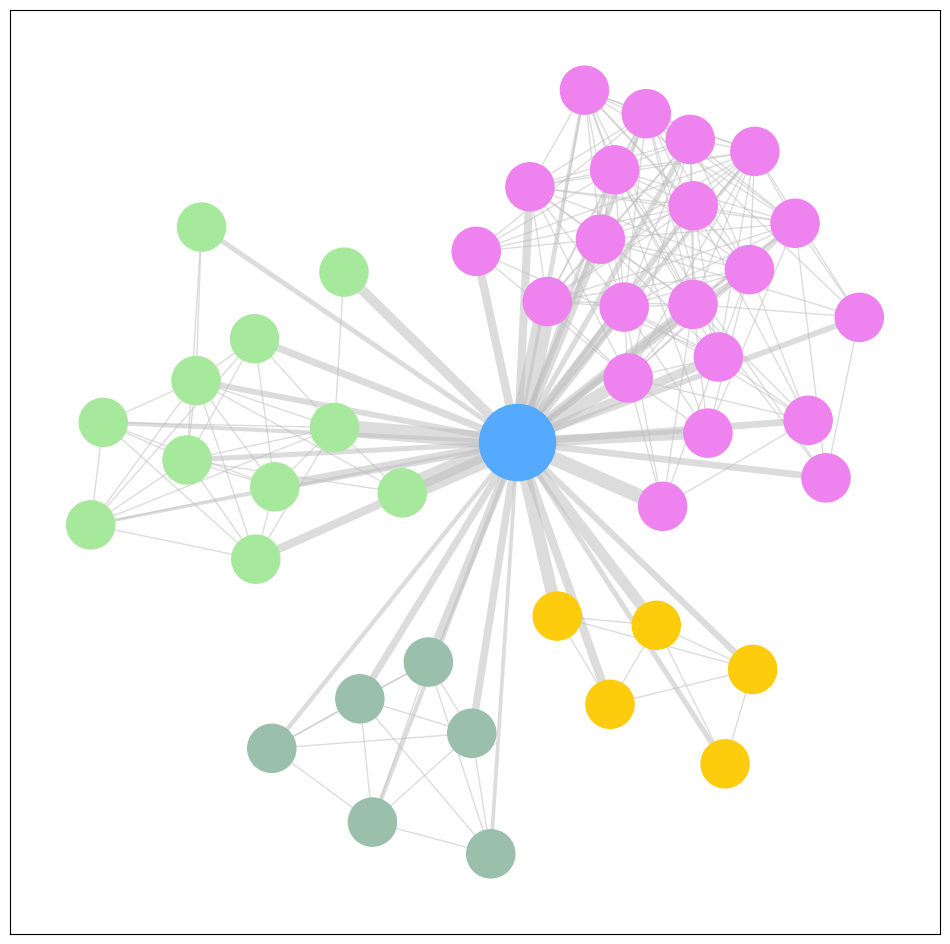

In [4]:
# move Format and move Node positions.
position = {gene.upper():(x, y) for gene, (x,y) in zip(edge_df['protein'], zip(edge_df['x_position'], edge_df['y_position']))}
position['NADK2'] = ( 0.56, 0.52 )

width_col = "relcorr"
with_labels = True
fig, ax = plot_clusters(
    node_df= codep,
    edge_df= edge_df,
    cluster_map=cluster_map,
    node_colors=cluster_id_to_color,
    position=position,
    root = GENE,
    boolLabelNodes=with_labels,
    boolAddRootEdge=True, 
    default_edge_color= "#bfbfbf88",
    boolUseDefaultEdgeColor= True,
    boolSpringlayout=True,
    width_col=width_col
)

# Set to True in order to save plots
if True:
    figName = f"TClusters_GOI_{GENE}_Species_{SPECIES}_Labels_{with_labels}_width{width_col}.png"
    fig.savefig(os.path.join(os.getcwd(), 'fig', figName), dpi = 600)


# NADK2 : Mus Musculus

In [ ]:
GENE ="NADK2"
SPECIES = "mus_musculus"
codep, clusters, coords, interactions = load_data(GENE, SPECIES)

# Species gene analog:
analog_gene_map = {
    "G6PD":"G6PDX",
    "FH":"FH1"
}

for k,v in analog_gene_map.items():
    print(f"Replacing {k} with {v}")
    codep['gene'].replace(k, v, inplace = True)

# Subset edges to only w/in cluster
win_cluster_interactions, cluster_map = get_within_cluster_interactions(GENE, clusters, interactions)

# Add in the coords
edge_df = win_cluster_interactions.merge(coords, how='inner', on ='protein')

# Unique clusters + 1 for root
cluster_cnt = len(edge_df['cluster_id'].unique())

print(f"{cluster_cnt} cluster(s) identified.")

In [ ]:
### Setup NADK2 Colors
edge_color_gray = "#E0E0DE"
# NADK2 cluster to colormap
cluster_color_map = {
    f"{GENE}-root":"#55AAFF",
    "Mitochondrial Gene Expression": "#EE82EE",
    "Tricarboxylic Acid Cycle": "#a7e99c",
    "Iron-sulfur Cluster Assembly": "#9ABFAB",
    "Protein Lipoylation":"#FDCC0D",
    "Mitochondrial Transit Peptide":"#B067A8",
    "Alpha-Amino Acid Metabolic Process":"#34ebcf"
}

cluster_id_to_color = {
    cluster_id:color for cluster_id, color in zip(list(range(cluster_cnt+1)), cluster_color_map.values())
}
cluster_id_to_name = {
    cluster_id:color for cluster_id, color in zip(list(range(cluster_cnt+1)), cluster_color_map.keys())
}
colors = list(cluster_color_map.values())

# Include 0, 1, 2, 4
cluster_id_to_name, cluster_id_to_color

### All Clusters

In [ ]:
position = {gene.upper():(x, y) for gene, (x,y) in zip(edge_df['protein'], zip(edge_df['x_position'], edge_df['y_position']))}
position[GENE] = ( 0.37, 0.47 )

moves = {
    "COX16":(-0.1,-0.17),"CALM1":(-0.2,-0.16),"CCDC47":(0.0,-0.12),
}

for gene, (x, y) in moves.items():
    position[gene] = (position[gene][0] + x, position[gene][1] + y )



width_col = "relcorr"
with_labels = True
fig, ax = plot_clusters(
    node_df= codep,
    edge_df= edge_df,
    cluster_map=cluster_map,
    node_colors=cluster_id_to_color,
    position=position,
    root = GENE,
    boolLabelNodes=with_labels,
    boolAddRootEdge=True, 
    default_edge_color= "#bfbfbf88",
    boolUseDefaultEdgeColor= True,
    boolSpringlayout=True,
    width_col=width_col
)

# Set to True in order to save plots
if True:
    figName = f"Clusters_GOI_{GENE}_Species_{SPECIES}_Labels_{with_labels}_width{width_col}.png"
    fig.savefig(os.path.join(os.getcwd(), 'fig', figName), dpi = 600)


#### Top 3 Clusters only

In [ ]:
position = {gene.upper():(x, y) for gene, (x,y) in zip(edge_df['protein'], zip(edge_df['x_position'], edge_df['y_position']))}
position[GENE] = ( 0.37, 0.47 )

moves = {
    "COX16":(-0.1,-0.17),"CALM1":(-0.2,-0.16),"CCDC47":(0.0,-0.12),
    "SLC25A19":(0.15,0.11),"LIPT2":(0.2,0.0), "G6PDX":(-0.2,0.0),
    "SDHB":(-0.07,-0.02), "OXSM":(0.0,-0.02), "MECR": (0.1, 0.05) ,
    "UQCRC1":(-0.2, -0.2), "DLST":(-0.3, 0.0), "SLC25A1":(-0.21, -0.1),
    "MAPK9":(-0.1, -0.14), "RBFA":(0.15, 0.0), "MDH2":(-0.075, -0.09)
}

for gene, (x, y) in moves.items():
    position[gene] = (position[gene][0] + x, position[gene][1] + y )

width_col = "relcorr"
with_labels = False
fig, ax = plot_clusters(
    node_df= codep,
    edge_df= edge_df,
    cluster_map=cluster_map,
    node_colors=cluster_id_to_color,
    clusters_to_include=[0, 1, 2, 4],
    position=position,
    root = GENE,
    boolLabelNodes=with_labels,
    boolAddRootEdge=True, 
    default_edge_color= "#bfbfbf88",
    boolUseDefaultEdgeColor= True,
    boolSpringlayout=True,
    width_col=width_col
)

# Set to True in order to save plots
if True:
    figName = f"3Clusters_GOI_{GENE}_Species_{SPECIES}_Labels_{with_labels}_width{width_col}.png"
    fig.savefig(os.path.join(os.getcwd(), 'fig', figName), dpi = 600)


# MECR : Homo Sapiens

### Load Data

In [ ]:
GENE ="MECR"
SPECIES = "homo_sapiens"
codep, clusters, coords, interactions = load_data(GENE, SPECIES)

# Subset edges to only w/in cluster
win_cluster_interactions, cluster_map = get_within_cluster_interactions(GENE, clusters, interactions)

# Add in the coords
edge_df = win_cluster_interactions.merge(coords, how='inner', on ='protein')

# Unique clusters + 1 for root
cluster_cnt = len(edge_df['cluster_id'].unique())

print(f"{cluster_cnt} cluster(s) identified.")

### Cluster color mapping

In [ ]:
### Setup MECR Colors

edge_color_gray = "#E0E0DE"
# NADK2 cluster to colormap
cluster_color_map = {
    f"{GENE}-root":"#55AAFF",
    "Mitochondrial Gene Expression": "#EE82EE",
    "tRNA Aminoacylation":  "#78d7e3",
    "tRNA Methylation":"#9ABFAB", 
    "Ubiquinone Biosynthetic Process":"#FF6F59",
    "Protein Lipoylation":"#FDCC0D",
    "Respiratory Chain Complex IV Assembly": "#a96ded",
}

cluster_id_to_color = {
    cluster_id:color for cluster_id, color in zip(list(range(cluster_cnt+1)), cluster_color_map.values())
}
cluster_id_to_name = {
    cluster_id:color for cluster_id, color in zip(list(range(cluster_cnt+1)), cluster_color_map.keys())
}
colors = list(cluster_color_map.values())

# Include 0, 1, 2, 4
cluster_id_to_name, cluster_id_to_color

### Visualize Clusters

In [ ]:
# move Format and move Node positions.
position = {gene.upper():(x, y) for gene, (x,y) in zip(edge_df['protein'], zip(edge_df['x_position'], edge_df['y_position']))}
position[GENE] = ( 0.52, 0.50 )

Cluster6_y_offset = 0.35
six_cluster_moves = {
    "SCO2":(0.03,Cluster6_y_offset+0.03),"COA7":(-0.02,Cluster6_y_offset),"PET117":(0.0,Cluster6_y_offset),
    "GATC":(0.0,Cluster6_y_offset),"COA6":(0.0,Cluster6_y_offset)
}

for gene, (x, y) in six_cluster_moves.items():
    position[gene] = (position[gene][0] + x, position[gene][1] + y )


width_col = "relcorr"
with_labels = True
fig, ax = plot_clusters(
    node_df= codep,
    edge_df= edge_df,
    cluster_map=cluster_map,
    node_colors=cluster_id_to_color,
    clusters_to_include=[0, 1, 2, 5],
    position=position,
    root = GENE,
    boolLabelNodes=with_labels,
    boolAddRootEdge=True, 
    default_edge_color= "#bfbfbf88",
    boolUseDefaultEdgeColor= True,
    boolSpringlayout=True,
    figsize=(15,15),
    width_col=width_col,
)

# Set to True in order to save plots
if True:
    figName = f"3Clusters_GOI_{GENE}_Species_{SPECIES}_Labels_{with_labels}_width{width_col}.png"
    fig.savefig(os.path.join(os.getcwd(), 'fig', figName), dpi = 600)


In [ ]:
session_info.show()